## k-Means Clustering

As we described earlier, *clustering* is the task of partitioning the dataset into groups, called clusters. The goal is to split up the data in such a way that points within a single cluster are very similar and points in different clusters are different. Similarly to classification algorithms, clustering algorithms assign (or predict) a number to each data point, indicating which cluster a particular point belongs to.

*k-means* clustering is one of the simplest and most commonly used clustering algorithms. It tries to find cluster centers that are representative of certain regions of the data. The algorithm alternates between two steps: assigning each data point to the closest cluster center, and then setting each cluster center as the mean of the data points that are assigned to it. The algorithm is finished when the assignment of instances to clusters no longer changes. 

The following example illustrates the algorithm on a synthetic dataset:

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn
from IPython.display import display
import mglearn

# Don't display deprecation warnings
import warnings
warnings.filterwarnings('ignore')

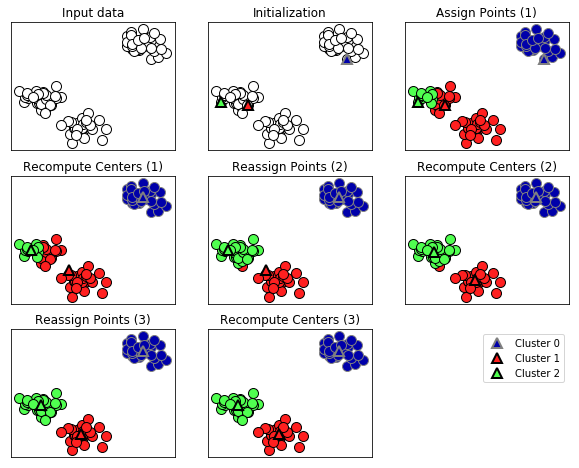

In [2]:
mglearn.plots.plot_kmeans_algorithm()

Cluster centers are shown as triangles, while data points are shown as circles. Colors indicate cluster membership. We specified that we are looking for three clusters, so the algorithm was initialized by declaring three data points randomly as cluster centers (see “Initialization”). Then the iterative algorithm starts. 

First, each data point is assigned to the cluster center it is closest to (see “Assign Points (1)”). 

Next, the cluster centers are updated to be the mean of the assigned points (see “Recompute Centers (1)”). Then the process is repeated two more times. 

After the third iteration, the assignment of points to cluster centers remained unchanged, so the algorithm stops.